In [1]:
import numpy as np

we are creating a dataset with 1 feature, so it will have 2 parameters. also our dataset will have 100 samples

In [2]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)
y = w1 + w0 * X + np.random.randn(n,)

In [3]:
print(X.shape)
print(y.shape)

(100,)
(100,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.20, random_state=42)
print(X_test.shape, y_test.shape, X_train.shape,y_train.shape)

(20,) (20,) (80,) (80,)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
X_train[:5]

array([5.31987277, 7.09340622, 4.67126386, 6.97148706, 1.05815219])

In [7]:
y_train[:5]

array([23.75489887, 31.35886143, 22.17852016, 30.26432667,  7.74818743])

## lets visualise the tarining set

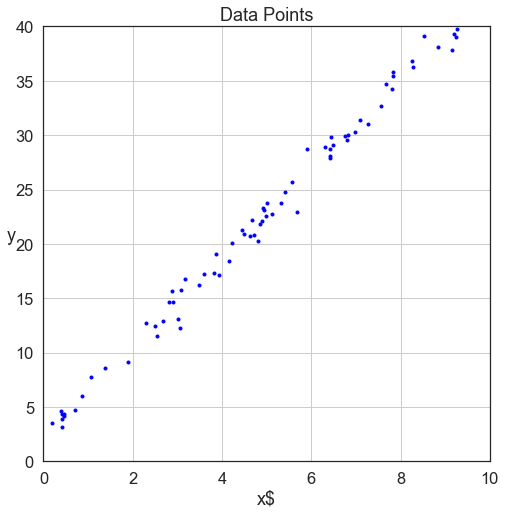

In [8]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("x$",fontsize = 18)
plt.ylabel("y",rotation = 0, fontsize = 18)
plt.axis([0,10,0,40])
plt.show()

In [9]:
np.column_stack((np.ones(X.shape[0]),X))

array([[1.        , 4.35922932],
       [1.        , 0.18638863],
       [1.        , 3.48895393],
       [1.        , 9.867352  ],
       [1.        , 4.87994689],
       [1.        , 3.07565775],
       [1.        , 7.83611382],
       [1.        , 4.16464024],
       [1.        , 0.45444119],
       [1.        , 2.54001717],
       [1.        , 2.41975677],
       [1.        , 6.78989903],
       [1.        , 9.20590811],
       [1.        , 6.76266801],
       [1.        , 6.47890934],
       [1.        , 3.01378779],
       [1.        , 5.56528357],
       [1.        , 4.63627627],
       [1.        , 5.3375664 ],
       [1.        , 7.55856483],
       [1.        , 3.60767847],
       [1.        , 2.87921892],
       [1.        , 0.05539551],
       [1.        , 4.71676175],
       [1.        , 0.4119288 ],
       [1.        , 1.88749107],
       [1.        , 4.67126386],
       [1.        , 3.87402755],
       [1.        , 0.40410671],
       [1.        , 9.68517618],
       [1.

In [10]:
def add_dummy_feature(x):
    '''adds dummy feature to the dataset
     Args:
       x: Training dataset
     Returns:
          Training dataset with an addition of dummy features
     '''
    #np.ones(x.shape[0]) creates a vector of 1's having the same no.of rows as no.of samples in dataset
    return np.column_stack((np.ones(x.shape[0]),x))

In [11]:
add_dummy_feature(np.array([1,3,4]))#test case

array([[1., 1.],
       [1., 3.],
       [1., 4.]])

# C2- Model

Linear regression model uses linear combination of features to obtain output labels.In vectorized form, thi can be written as $y=Xw$

In [12]:
def predict(X,w):
    '''Predictioon of output label for a given input
        Args:
           X: Feature matrix of shape(n,m+1)
           w: weight vector of shape(m+1,n)
        Returns:
            y:Predicted label vector of shape(n,)
    '''
    #check that feature matrix and weight vector have compactible shapes
    assert X.shape[-1]==w.shape[0]

    y = X @ w #matrix vec multiplicaiton
    return y

In [13]:
#testing if predict works or not
A = np.array([[1,3,2,5],[1,9,4,7]]) #feature matrix
r = np.ones(4)
l = predict(A,r)
l

array([11., 21.])

Demonstrating this model on a synthetic dataset

In [14]:
#Preparing the dataset
[w0,w1]=[4,3]
n=100
x=10*np.random.randn(n,)
y = w0+w1*x+np.random.randn(n,)

In [15]:
#preprocessing: dummy feature and train test split
X_with_dummy = add_dummy_feature(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_dummy, y, test_size=0.2, random_state=42)

In [16]:
w = np.random.rand(2,)
w

array([0.98030001, 0.87084068])

In [17]:
y_hat = predict(X_train,w)

In [18]:
y_hat[:10]

array([-8.22306343,  7.05603468,  0.99785679,  3.6228812 , 10.25700396,
        8.39945756,  7.79554809, 21.8665223 , -9.14935768, -2.39473461])

In [19]:
y[:10]

array([ 54.23297529,  76.3577602 ,  17.49766545,  35.94363563,
         4.69653337,  -5.87358901,  14.0994553 , -28.32028029,
       -26.30815447, -31.49022843])

In [20]:
def non_vectorized_predict(X,w):
    '''Prediction of output for a given input.
    Args:
        X: Feature matrix of shape (n, m+1)
        w: Weight vector of shape (m+1, n)
    Returns:
        y: Predicted label vector of shape (n, ).
    '''
    y = []
    for i in range(0,X.shape[0]):
        y_hat_i = 0
        for j in range(0,X.shape[1]):
            y_hat_i += X[i][j]*w[j]
        y.append(y_hat_i)
    return np.array(y)

# C3 - Loss

Loss fun is:
$$J(w) = \frac{1}{2}(Xw-y)^t(Xw-y)$$
 - X is a feature matrix with (m+1) features for n examples along rows
 - w is a weight vector containing (m+1) weights one for each feature
 - y is a label matrix containign labels for n examples in a vector of shape(n,)

In [21]:
def loss(features, labels, weights):
    e = predict(features, weights) - labels # e = predict(X,w)-y
    loss = (1/2) * (np.transpose(e) @ e)
    return loss

In [22]:
c = np.array([6,11])
loss(A,c,r)

62.5

# C4- Optimaization

Optimization is done with one of the two following methods:
- Normal Equaiton method, that sets the partial derivative of the loss function wrt weight vectors to 0 and solves the resulting equation to obtain the weight vector
- Gradient descent method, that iteratively adjusts the weight vectir based on the learning rate and the gradient of loss function at the current weight vector

## Normal equation
- we make use of `np.linalg.pinv` for calculating the psuedoinverse of the feature matrix

In [23]:
 def normal_equation(X, y):
    '''Estimates parameters of the linear regression model with normal equation
    Args:
        X: feature matrix for given inputs.
        y: Actual label vector

    Returns:
        Weight vector
    '''
    return np.linalg.pinv(X) @ y

In [24]:
normal_equation(X_train,y_train)

array([3.88157279, 2.99069417])

## Gradient descent


### calculating the gradient
GD is implemented as follows

- Randomly initialize  to 0.
- Iterate until convergence:
    - Calculate partial derivative of loss w.r.t weight vector
    - Calculate new values of weights
    - Update weights to new values simultaneously

We use number of epochs as a convergence criteria in this implementation
*partial derivative of loss function is* $$ \frac{\partial }{\partial w} J(w) = X^T(Xw-y)$$
The multipication of transpose of feature matrix with the difference of predicted and actual label vectors

In [25]:
def calculate_gradient(X,y,w): #(feature matrix,label vector, weights)
    return np.transpose(X) @ (predict(X,w)-y)

g=calculate_gradient(A,c,r)
g

array([ 15., 105.,  50.,  95.])

### Weight updates

In [26]:
def update_weights(w, grad, lr):

    '''updates the wieights based on the gradient of the loss function.
    weight updates are carried out with the following formula:
    w_new := w_old - lr * grad

    Args:
      1. w : wight vector
      2. grad: gradient of loss wrt w
      3. lr: learning rate

    Returns:
      Updated Weight Vector
    '''
    return (w-(lr*grad))

In [27]:
lr = 0.001
update_weights(r,g,lr)

array([0.985, 0.895, 0.95 , 0.905])

In [28]:
def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int):
    '''estimates parameters of linear regression model thru gradient gradient_descent
    Returns:
        weight vector: final weight vector
        error vec acroos diff iterations
        weight vec across diff iterations
    '''
    w_all = [] #Al parameters across diffrent iterations
    err_all = [] #all errors across diff iterations

    #parameter vector initialized to [0,0]
    w = np.zeros(X.shape[1])
    #gradient desent loop
    print()
    for i in np.arange(0,num_epochs):
        w_all.append(w)
        err_all.append(loss(X,y,w))
        dJdw = calculate_gradient(X,y,w)
        if (i%100) == 0:
            print('Iteration #: %d, loss: %4.2f'%(i, err_all[-1]))
        w = update_weights(w,dJdw,lr)
    return w, err_all, w_all

# Assignment

In [29]:
def add_one(X):
    a = np.ones(shape(X))


In [30]:
column.stack?

Object `column.stack` not found.


In [31]:
matrix = np.array([[2,4,6,8],[1,3,5,7],[1,2,3,4],[5,6,7,8]])

In [32]:
matrix

array([[2, 4, 6, 8],
       [1, 3, 5, 7],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

In [37]:
newcol = np.ones(4)
newcol
c = np.array([0,1,0,1])
c

array([0, 1, 0, 1])

In [38]:
np.concatenate((matrix,c),axis = 0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)